In [35]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)


SyntaxError: invalid syntax (<ipython-input-35-d960544c3de0>, line 1)

In [36]:
loc = '../data/'
file = 'data_features.csv'
df = pd.read_csv(loc+file)

try:
    df = df.drop(['str_dif.1'], axis=1)
except:
    pass

df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6317, 22)


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6314,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685


In [37]:
df.describe()

,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
count,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6317.000000,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03
mean,6.549469e-16,5.641627e-17,-5.615264e-17,3.059125e-16,2.164326e-17,3.731152e-18,-0.025645,2.420416e-17,2.558889e-17,1.250390e-17,5.494442e-17,5.773953e-13,-1.684217e-16,-1.952546e-17,1.702457e-16
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.028682,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-6.734691e+00,-1.149050e+01,-7.843860e+00,-7.708508e+00,-6.246212e+00,-3.471757e+00,-15.400000,-1.204944e+01,-6.841781e+00,-1.278720e+01,-5.732951e+00,-2.786961e+00,-2.453751e+00,-5.573598e+00,-4.094401e+00
25%,-1.065953e-03,-5.159838e-01,-3.858767e-01,1.426294e-02,-5.691375e-01,-5.962029e-01,-0.500000,-6.313305e-01,-5.692055e-01,-5.572237e-01,-5.199896e-01,1.164176e-01,-5.474422e-01,-7.355387e-01,-5.923590e-01
50%,-1.065953e-03,-4.022606e-04,6.648761e-03,1.426294e-02,8.097153e-03,-7.233981e-03,0.000000,-2.233757e-03,8.531681e-03,5.582888e-03,1.306610e-03,1.164176e-01,2.197466e-02,-3.633803e-01,5.749883e-01
75%,-1.065953e-03,4.783520e-01,3.991742e-01,1.426294e-02,5.797276e-01,5.817350e-01,0.400000,6.394450e-01,5.862689e-01,5.747131e-01,5.226028e-01,1.164176e-01,4.923625e-01,3.809366e-01,5.749883e-01
max,6.732559e+00,6.628503e+00,6.287056e+00,8.595120e+00,6.733161e+00,3.457289e+00,11.800000,5.936440e+00,5.290701e+00,5.608354e+00,6.256861e+00,5.546282e+00,2.497700e+00,6.707630e+00,3.493357e+00


In [38]:
features = df.columns[7:]
len(features)
print(features)

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif'],
      dtype='object')


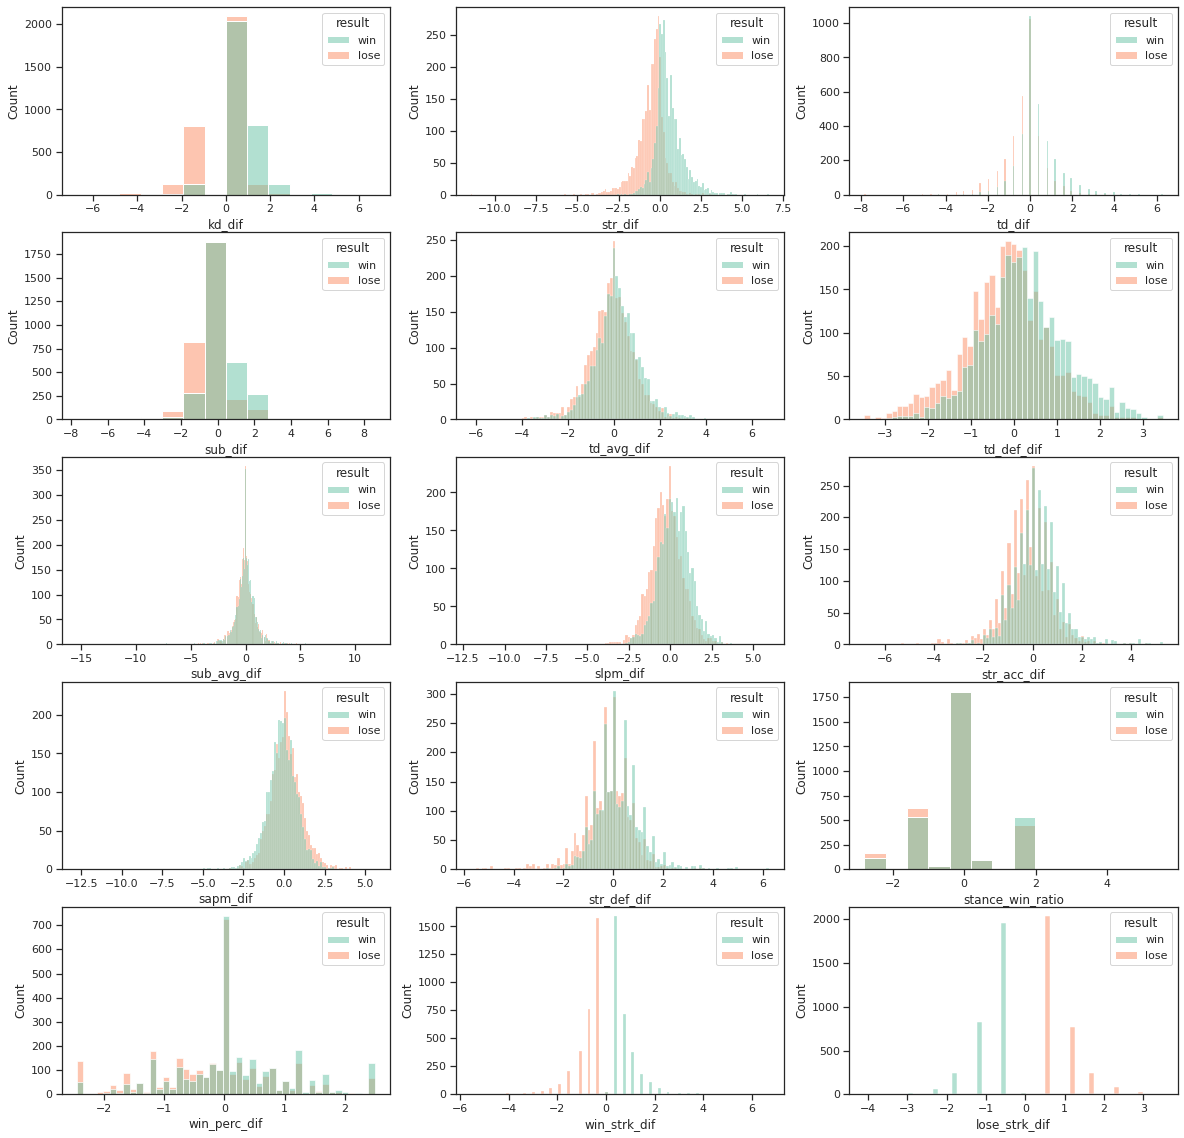

In [39]:
rows=5
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))

i = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(ax=axs[row,col], x=features[i], data=df, hue='result')
        i += 1

In [47]:
X = features # prediction model features
data = df.copy()

for feature in X:
    ucl = np.mean(df[feature]) + 3*np.std(df[feature])
    lcl = np.mean(df[feature]) - 3*np.std(df[feature])
    print('cleaning %s: %s' %(feature,data.shape))
    data = data[(data[feature] < ucl) & (data[feature] > lcl)].reset_index(drop=True)
       

cleaning kd_dif: (6317, 22)
cleaning str_dif: (6262, 22)
cleaning td_dif: (6176, 22)
cleaning sub_dif: (6070, 22)
cleaning td_avg_dif: (5958, 22)
cleaning td_def_dif: (5891, 22)
cleaning sub_avg_dif: (5870, 22)
cleaning slpm_dif: (5797, 22)
cleaning str_acc_dif: (5767, 22)
cleaning sapm_dif: (5678, 22)
cleaning str_def_dif: (5634, 22)
cleaning stance_win_ratio: (5601, 22)
cleaning win_perc_dif: (5597, 22)
cleaning win_strk_dif: (5597, 22)
cleaning lose_strk_dif: (5539, 22)


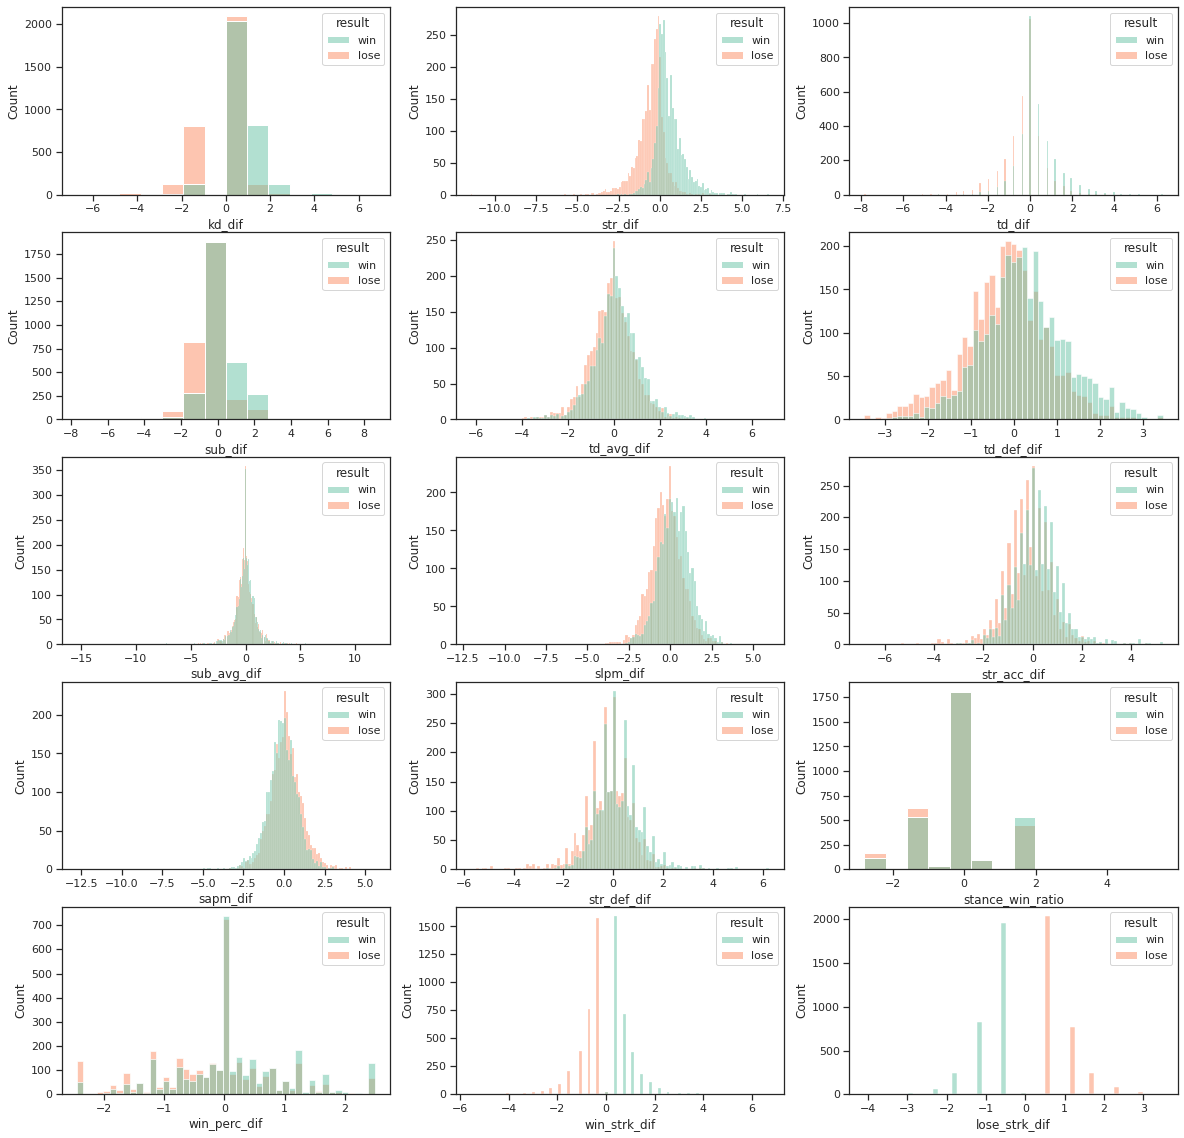

In [48]:
rows=5
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))

i = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(ax=axs[row,col], x=features[i], data=df, hue='result')
        i += 1

In [49]:
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5523,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685
5524,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685
5525,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685


## Train Local Outlier Factor model: 
LOF model detect outliers based on data points density, a point with lower density will be counted as an outlier

In [44]:
X

,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,-0.001066,2.614333,0.006649,0.014263,-0.462657,0.269928,0.0,2.400916,0.586269,1.226051,-0.172459,-1.002921,-0.646471,0.380937,-0.592359
1,1.345659,0.073252,0.006649,0.014263,-0.625180,0.581735,-1.1,-2.430547,-1.146943,-1.050470,1.565195,0.116418,-0.275112,0.380937,-0.592359
2,1.345659,0.110079,0.006649,0.014263,0.204245,0.789606,0.0,-0.549548,0.833871,-0.569871,-0.085576,1.572764,0.517120,0.753095,-1.176033
3,-0.001066,0.920279,0.399174,0.014263,2.670101,0.547090,0.0,0.287151,-0.651739,0.524124,-1.041286,1.572764,-0.101812,0.380937,-1.176033
4,1.345659,-0.626466,0.006649,0.014263,0.080952,0.235283,0.5,0.343769,-1.229477,1.991215,-0.606872,0.116418,-1.141616,0.380937,-0.592359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6312,-0.001066,0.036425,-0.385877,-1.701908,0.008097,-2.293819,-0.8,-0.555839,-3.375358,-0.708992,-3.213353,-1.002921,0.021975,-1.479856,0.574988
6313,-0.001066,-0.110884,0.399174,-4.276165,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685
6314,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685
6315,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685


In [52]:
lof = set_outlier_detection_model(X_columns=X, data=data, n=20, contemination=0.05)
lof

LocalOutlierFactor(contamination=0.05, n_jobs=-1)

In [53]:
data['inlier'] = lof.fit_predict(data[X])
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,inlier
5523,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,1
5524,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,1
5525,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,1


In [54]:
print(data.shape)
data = data[data.inlier == 1].reset_index(drop=True)
data = data[data.columns[0:len(data.columns)-1]]
data.tail(3)
print(data.shape)

(5526, 23)
(5249, 22)


In [55]:
data.to_csv('../data/data_features_no_outliers.csv', index=None)
print('../data/data_features_no_outliers.csv saved.')

../data/data_features_no_outliers.csv saved.
